#**Tarea 2 Unidad 2**


##  Finanzas Cuantitativas`

**Profesor**: Dr. Julio Cesar Galindo Lopez

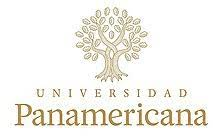


**Integrantes:**


Valeria Alvarez Solis

Paula Hernandez Matus

Regina Trigo Zamora

Gisela Marina Villalobos Hellmund

In [ ]:
#importacion de modulos
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import seaborn as sns

 **1.- Carga la base de datos precios_muestra.csv y calcula lo siguiente:
• los rendimientos simples;
• la media y la desviación estándar de los rendimientos**

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
d=pd.read_csv("/content/drive/MyDrive/POODB/precios_muestra.csv") # se descarga de nuestro Google Drive, del archivo POODB la base de datos "precios_muestra"

In [ ]:
d # base de datos "precios_muestra"

,BLUE,ORANGE
0,8.7000,10.6600
1,8.9055,11.0828
2,8.7113,10.7100
3,8.4346,11.5907
4,8.7254,12.1070
5,9.0551,11.7876
6,8.9514,11.2078
7,9.2439,12.5192
8,9.1276,13.3624
9,9.3976,14.4080


In [ ]:
rendimientos_simple=d.pct_change().dropna() # con la funcion .pct_change().dropna() recuperamos los rendimientos simples de la base de datos
rendimientos_simple

,BLUE,ORANGE
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249
10,0.006151,-0.168261


In [ ]:
rendimientos_simple.describe() # con esta funcion se describen los datos de los rendimientos recuperados

,BLUE,ORANGE
count,12.000000,12.000000
mean,0.010000,0.010000
std,0.023977,0.079601
min,-0.031763,-0.168261
25%,-0.011734,-0.037525
50%,0.016655,0.031852
75%,0.030355,0.070077
max,0.037786,0.117008


In [ ]:
rendimientos_simple.mean() # media de los rendimientos

BLUE      0.01
ORANGE    0.01
dtype: float64

In [ ]:
desviacion = rendimientos_simple.std() # desviacion estandar de los rendimientos

**2.- Ahora que tenemos una serie de rendimientos de 12 meses, podemos producir el rendimiento compuesto multiplicando los rendimientos de los períodos individuales, siempre y cuando los rendimientos se expresen como tasas de crecimiento.**

In [ ]:
rendimientos_compuesto=(rendimientos_simple+1).prod()-1 # con esta formula se recupera el rendimiento compuesto con los datos recuperados del rendimiento simple de las series BLUE y ORANGE
rendimientos_compuesto

BLUE      0.123310
ORANGE    0.087167
dtype: float64

**3.- Anualiza un 1% mensual, un 4% trimestral y un 0,01% de rentabilidad diaria.***

In [ ]:
mensual =(1+.01)**12
trimestral = (1+.04)**4
diaria = (1+.0001)**252

# con la formulas anteriores podemos recuperar la tasa que se pide de acuerdo al periodo dado


In [ ]:
mensual
# en esta variable guardamos el valor de la tasa de 1% con capitalización mensual anualizada. Usamos la fórmula (1 + i)**n n = número de capitalizaciones al año

1.1268250301319698

In [ ]:
trimestral
# en esta variable guardamos el valor de la tasa de 4% con capitalización trimestral anualizada. Usamos la fórmula (1 + i)**n n = número de capitalizaciones al año

1.1698585600000002

In [ ]:
diaria
# en esta variable guardamos el valor de la tasa de .01% con capitalización diaria anualizada. Usamos la fórmula (1 + i)**n n = número de capitalizaciones al año

1.0255189119876946

**4.- Ahora, anualiza la volatilidad escalándola (multiplicándola) por la raíz cuadrada del número de
períodos por observación**

In [ ]:
volatilidad_anualizada = desviacion * (1/12)
volatilidad_anualizada
# creamos una variable llamada volatilidad_anualizada en donde guardamos el valor de la desviación estándar elevada a la raíz de 12 que es el número de periodos de observación

BLUE      0.001998
ORANGE    0.006633
dtype: float64

**5.- En tu Módulo (que creaste en las sesiones), escribe atributos a tu clase ya formada en donde
calcules el rendimiento compuesto y en donde anualices rendimientos**

In [ ]:
# Modulo creado en clase
from datetime import datetime
import yfinance as yf

class Asset:
    def _init_(self, ticker, start_date, end_date=datetime.today().strftime('%Y-%m-%d')):
        self.ticker = ticker
        self.start_date = start_date
        self.end_date = end_date
        self.data = self.get_data()
    def get_data(self):
        df = yf.download(self.ticker, start=self.start_date, end=self.end_date)
        return df

    def simple_returns(self, adj=False, cum=False):
        if adj:
            simple_returns = self.data["Adj Close"].pct_change().dropna()
        else:
            simple_returns = self.data["Close"].pct_change().dropna()
        if cum:
            simple_returns = (1 + simple_returns).cumprod() - 1
        return simple_returns


In [ ]:
    # Atributos nuevos con rendimiento compuesto y anualizado
    def calculate_compound_return(self):
        simple_returns = self.simple_returns()
        compound_return = (1 + simple_returns).prod() - 1
        return compound_return

    def annualize_returns(self, rendimiento_periodo, periodos_por_anio):
        return (1 + rendimiento_periodo) ** periodos_por_anio - 1

**6.- Crea un DataFrame a partir de un diccionario cuyas columnas sean “Stock A” y “Stock B”. Cada
columna tendrá 10 valores que deberás elegir a partir de una distribución normal con parámetros
10 (media) y 2 (desviación estándar).**

In [ ]:
data = {
    "Stock A": np.random.normal(10, 2, 10),
    "Stock B": np.random.normal(10, 2, 10)
}

df = pd.DataFrame(data)
print(df)
# Se crea un data frame a partir del diccionario con dos acciones que tienen valores aleatorios con una distrubucion normal con los parametros indicadios

     Stock A    Stock B
0   9.787531   6.601612
1  12.742870   8.510754
2   5.027406  12.686483
3  12.134356  11.845832
4  12.241499  10.920893
5   7.963079  11.704011
6   9.636682  10.293200
7   8.371582   7.211999
8   7.632829   9.958847
9   9.210219  11.820099


**7.- Usando las funciones ya creadas en tu Módulo, calcular el rendimiento total (compuesto) durante
todo el período de tiempo. También, calcula la media y la desviación estándar de cada Stock.
Después, anualiza la desviación estándar.**

In [ ]:
rendimiento_stocks=df.pct_change().dropna()
rendcompuesto_stocks = (rendimiento_stocks + 1).prod() - 1

#Rendimiento de los stocks
rendcompuesto_stocks


Stock A   -0.058984
Stock B    0.790487
dtype: float64

In [ ]:
media_stocks=rendimiento_stocks.mean() # Calculo de la media de los rendimientos de los stocks
media_stocks # imprimir el resultado

Stock A    0.107417
Stock B    0.095009
dtype: float64

In [ ]:
desviacion_stocks=rendimiento_stocks.std() # Calculo de la desviacion estandar de los rendimientos de los stocks
desviacion_stocks  # imprimir el resultado

Stock A    0.568599
Stock B    0.260500
dtype: float64

**8.- Crea dos activos artificiales que llamarás “AA” y “BB”, respectivamente. Supongamos que un
cierto activo “AA” pierde 1% por mes durante 12 meses y un cierto activo “BB” gana 1% por mes
para los 12 meses. ¿Cuál es el activo más volátil? Recuerda que la volatilidad se mide a
través de la desviación estándar.**

In [8]:
rendimientos_AA = pd.Series([-0.01] * 12) # Creamos la serie de datos para el activo "AA", el cual pierde 1% al mes durante 12 meses
rendimientos_BB = pd.Series([0.01] * 12) # Creamos la serie de datos para el activo "BB", el cual gana 1% al mes durante 12 meses
volatilidad_AA = np.std(rendimientos_AA)
volatilidad_BB = np.std(rendimientos_BB) # Ahora calculamos la desviación estándar de "AA" y "BB" (rendimientos) para poder medir la volatilidad

import pandas as pd


NameError: ignored

In [9]:
if volatilidad_AA > volatilidad_BB:
    print("El activo AA es más volátil.")
elif volatilidad_BB > volatilidad_AA:
    print("El activo BB es más volátil.")
else:
    print("Ambos activos obtienen la misma volatilidad.")
# Comparamos la volatilidad entre los activos

import pandas as volatilidad_AA

NameError: ignored

**9.- Usando tu Módulo, descarga los tickers “AMZN”, “KO”, “MSFT” desde el primero de enero
del 2011 hasta el primero de enero del 2019. Realiza un análisis financiero usando lo visto en clase
y los incisos anteriores. Finalmente, realiza un histograma para los rendimientos de cada ticker.
¿Qué observas de los histogramas?**

In [10]:
#descargamos datos
amzn_asset = Asset("AMZN", "2011-01-01", "2019-01-01")
ko_asset = Asset("KO", "2011-01-01", "2019-01-01")
msft_asset = Asset("MSFT", "2011-01-01", "2019-01-01")


NameError: ignored

In [6]:
amzn_compound_return = amzn_asset.calculate_compound_return()
ko_compound_return = ko_asset.calculate_compound_return()
msft_compound_return = msft_asset.calculate_compound_return()
# Comparamos redimientos



AttributeError: ignored

In [3]:
print("Rendimiento de AMZN:", amzn_compound_return)
print("Rendimiento de KO:", ko_compound_return)
print("Rendimiento de MSFT:", msft_compound_return)
amzn_simple_returns = amzn_asset.simple_returns()
ko_simple_returns = ko_asset.simple_returns()
msft_simple_returns = msft_asset.simple_returns()
# Calculamos rendimientos (simples)

NameError: ignored

In [ ]:
plt.figure(figsize=(12, 6))
plt.hist(amzn_simple_returns, bins=50, alpha=0.5, label="AMZN")
plt.hist(ko_simple_returns, bins=50, alpha=0.5, label="KO")
plt.hist(msft_simple_returns, bins=50, alpha=0.5, label="MSFT")
plt.xlabel("Rendimiento Simple")
plt.ylabel("Frecuencia")
plt.legend()
plt.title("Histograma de Rendimientos Simples")
plt.show()
# Creamos un histograma con los rendimientos simples obtenidos anteriormente

**10.- Bosqueja la serie de tiempo para cada ticker del inciso anterior. ¿Cuáles son tus conclusiones?**

In [ ]:
# Ceamos gráfica de AMZN
plt.figure(figsize=(6, 3))
plt.plot(amzn_asset.data.index, amzn_asset.data["Adj Close"], label="AMZN", color='blue')
plt.xlabel("Fecha")
plt.ylabel("Precio de Cierre Ajustado")
plt.title("Serie de Tiempo de AMZN")
plt.legend()
plt.grid()
plt.show()


In [ ]:
# Creamos gráfica de KO
plt.figure(figsize=(6, 3))
plt.plot(ko_asset.data.index, ko_asset.data["Adj Close"], label="KO", color='green')
plt.xlabel("Fecha")
plt.ylabel("Precio de Cierre Ajustado")
plt.title("Serie de Tiempo de KO")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Creaos gráfica de MSFT
plt.figure(figsize=(6, 3))
plt.plot(msft_asset.data.index, msft_asset.data["Adj Close"], label="MSFT", color='red')
plt.xlabel("Fecha")
plt.ylabel("Precio de Cierre Ajustado")
plt.title("Serie de Tiempo de MSFT")
plt.legend()
plt.grid()
plt.show()

# Conclusión

# Tras analizar exhaustivamente las tendencias y desempeño de las tres empresas, podemos extraer conclusiones significativas. Estas compañías han demostrado un crecimiento destacable en sus respectivas industrias, destacando su impacto y eficiencia en el mercado empresarial.

# Es interesante notar que Amazon y Microsoft, siendo empresas con una orientación tecnológica más marcada, han demostrado un potencial de crecimiento superior en comparación con Coca Cola. Este diferencial se ha materializado en un crecimiento más pronunciado durante el período de estudio.

# A lo largo del análisis, se ha observado que las tres empresas mantienen un crecimiento constante en sus operaciones. Sin embargo, Amazon ha presentado ciertas fluctuaciones, lo cual es comprensible dado su condición de empresa relativamente más reciente en comparación con las otras dos. Este hecho subraya la importancia de considerar el contexto y la trayectoria de cada empresa al evaluar su desempeño y proyecciones futuras en el mercado.